# Oversampling Techniques for Imbalanced Datasets

In this notebook, we explore various **oversampling techniques** that are commonly used to handle imbalanced datasets, especially in classification tasks. These techniques aim to balance the class distribution by increasing the number of samples in the minority class.

## 1. **Synthetic Minority Oversampling Technique (SMOTE)**
SMOTE is a popular oversampling technique that generates synthetic samples for the minority class by interpolating between existing samples. It helps in creating more diverse samples, reducing overfitting in imbalanced datasets.

## 2. **Adaptive Synthetic Sampling (AdaSyn)**
AdaSyn is an enhancement of SMOTE that focuses on generating more synthetic samples near the decision boundary of the minority class. It prioritizes difficult-to-learn examples, making the classifier's decision boundary more accurate.

## 3. **Random Oversampling (ROS)**
ROS is a simpler technique where samples from the minority class are randomly duplicated until the dataset achieves a more balanced distribution. While easy to implement, this method may lead to overfitting due to the duplication of minority class samples.

---
These techniques are crucial when dealing with imbalanced datasets, as they help improve the model's performance by providing more examples of the minority class.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/home/saumyaryan/Documents/PR/PR_201/Files/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print('Fraudulent Transactions:', len(fraud))
print('Legitimate Transactions:', len(legit))

Fraudulent Transactions: 492
Legitimate Transactions: 284315


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split


df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

fraud_train, fraud_test = train_test_split(fraud, test_size=0.3, random_state=42)
legit_train, legit_test = train_test_split(legit, test_size=0.3, random_state=42)

train_data = pd.concat([fraud_train, legit_train])
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print('Training Data Shape:', train_data.shape)

print('Fraud Data test Shape: ', fraud_test.shape)
print('Legitimate Data test Shape: ', legit_test.shape)

train_data = train_data.values
fraud_test = fraud_test.values
legit_test = legit_test.values

x_train = train_data[:, 1:30]
y_train = train_data[:, 30]


x_fraud_test = fraud_test[:, 1:30]
y_fraud_test = fraud_test[:, 30]

x_legit_test = legit_test[:, 1:30]
y_legit_test = legit_test[:, 30]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_fraud_test = scaler.transform(x_fraud_test)
x_legit_test = scaler.transform(x_legit_test)

print('X_train Shape:', x_train.shape)
print('Y_train Shape:', y_train.shape)
print('X_fraud_test Shape:', x_fraud_test.shape)
print('Y_fraud_test Shape:', y_fraud_test.shape)
print('X_legit_test Shape:', x_legit_test.shape)
print('Y_legit_test Shape:', y_legit_test.shape)

Training Data Shape: (199364, 31)
Fraud Data test Shape:  (148, 31)
Legitimate Data test Shape:  (85295, 31)
X_train Shape: (199364, 29)
Y_train Shape: (199364,)
X_fraud_test Shape: (148, 29)
Y_fraud_test Shape: (148,)
X_legit_test Shape: (85295, 29)
Y_legit_test Shape: (85295,)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

def evaluate_model(model, x_train, y_train, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test):
    """
    Evaluates a given model on training and test data.

    Args:
        model: The machine learning model to evaluate.
        x_train, y_train: Training data and labels.
        x_legit_test, y_legit_test: Test data and labels for legitimate transactions.
        x_fraud_test, y_fraud_test: Test data and labels for fraudulent transactions.

    Returns:
        A dictionary containing:
            - Legitimate accuracy
            - Fraud accuracy
            - Confusion matrix for legitimate and fraudulent tests
    """
    # Train the model
    model.fit(x_train, y_train)

    # Predict on legitimate and fraudulent test sets
    y_pred_legit = model.predict(x_legit_test)
    y_pred_fraud = model.predict(x_fraud_test)

    # Calculate confusion matrices
    cm_legit = confusion_matrix(y_legit_test, y_pred_legit)
    cm_fraud = confusion_matrix(y_fraud_test, y_pred_fraud)

    # Evaluate accuracies
    accuracy_legit = model.score(x_legit_test, y_legit_test)
    accuracy_fraud = model.score(x_fraud_test, y_fraud_test)

    return {
        "accuracy_legit": accuracy_legit,
        "accuracy_fraud": accuracy_fraud,
        "confusion_matrix_legit": cm_legit,
        "confusion_matrix_fraud": cm_fraud
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=['Legitimate', 'Fraudulent']):
    """
    Plots a confusion matrix using seaborn heatmap.

    Args:
        cm: Confusion matrix to plot.
        title: Title of the plot.
        labels: List of class labels (default ['Legitimate', 'Fraudulent']).
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.94620
Decision Tree Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


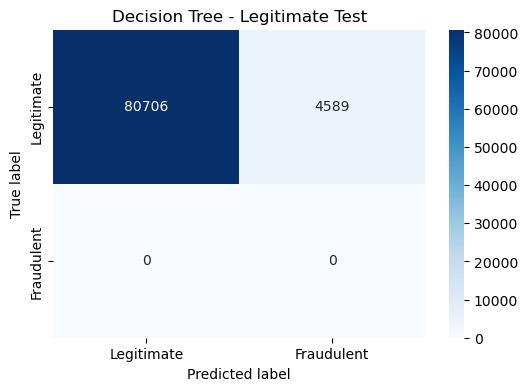

Confusion Matrix for Fraudulent Test Set:


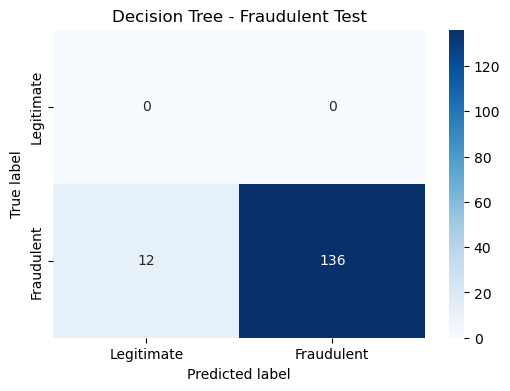

Evaluating SVM...
SVM Legit Accuracy: 0.98436
SVM Fraud Accuracy: 0.88514
Confusion Matrix for Legitimate Test Set:


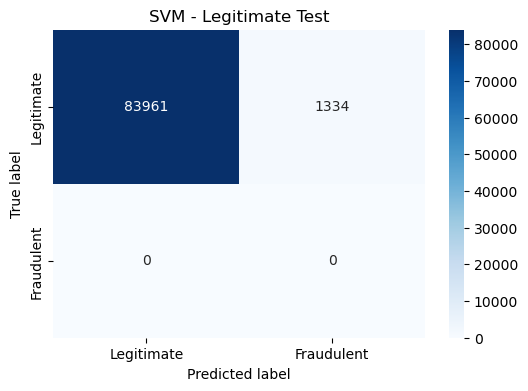

Confusion Matrix for Fraudulent Test Set:


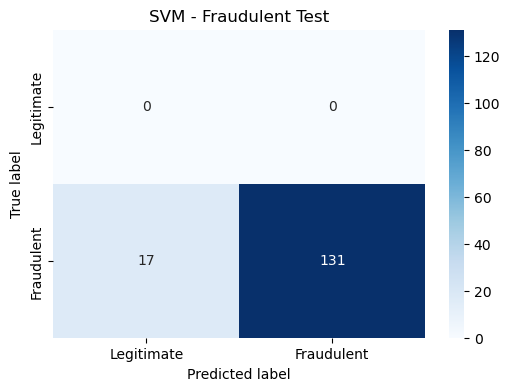

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.99975
Random Forest Fraud Accuracy: 0.82432
Confusion Matrix for Legitimate Test Set:


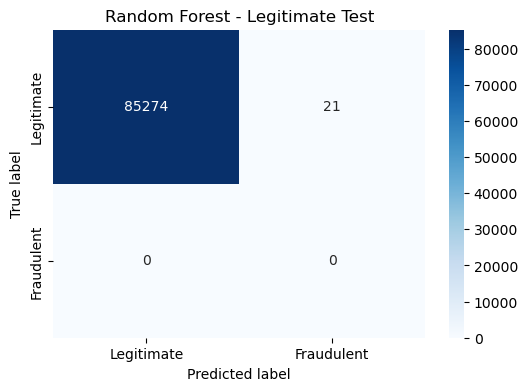

Confusion Matrix for Fraudulent Test Set:


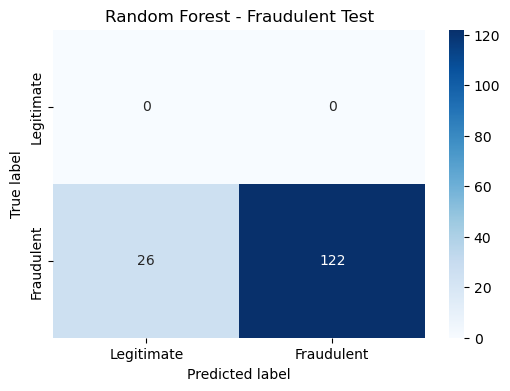

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97417
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


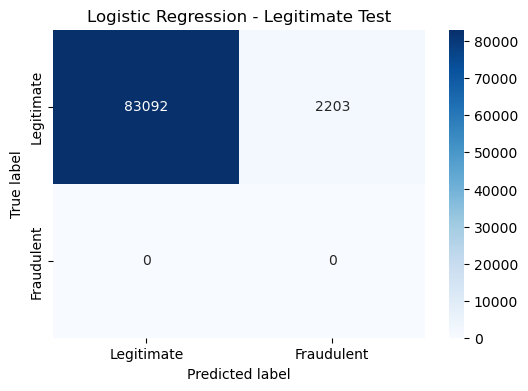

Confusion Matrix for Fraudulent Test Set:


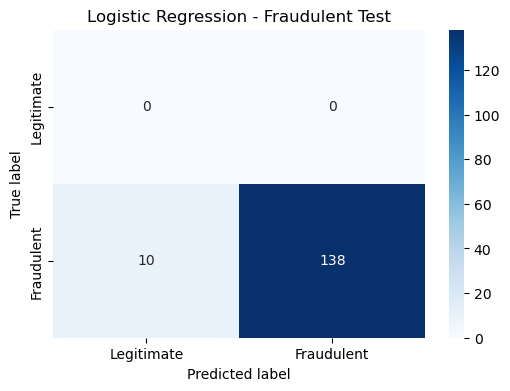

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.96776
AdaBoost Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


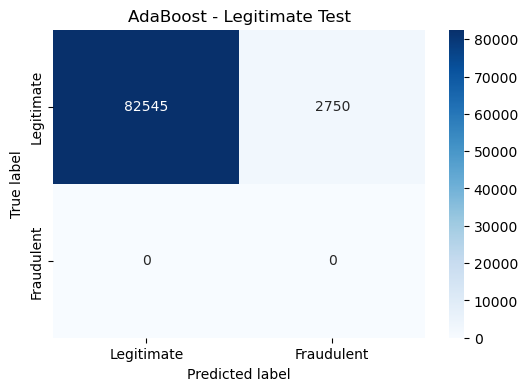

Confusion Matrix for Fraudulent Test Set:


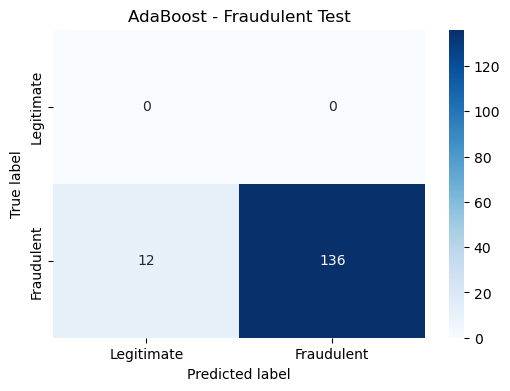

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97604
GaussianNB Fraud Accuracy: 0.86486
Confusion Matrix for Legitimate Test Set:


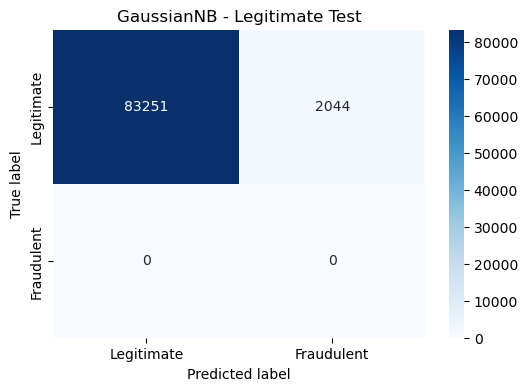

Confusion Matrix for Fraudulent Test Set:


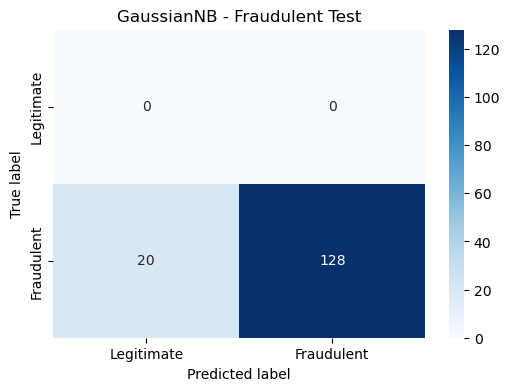

Evaluating KNN...
KNN Legit Accuracy: 0.99841
KNN Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


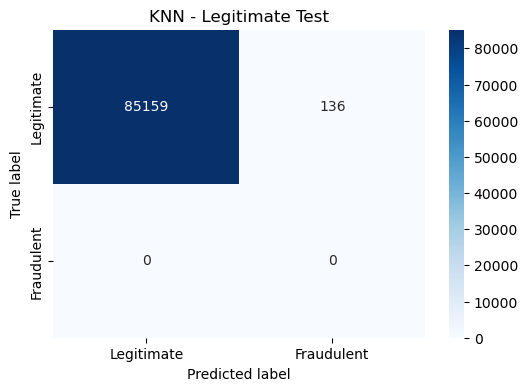

Confusion Matrix for Fraudulent Test Set:


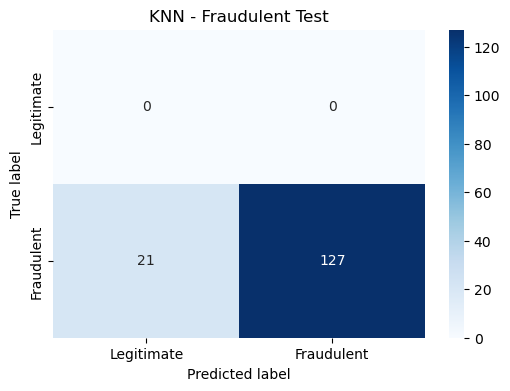

Evaluating XGBoost...


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:45:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Legit Accuracy: 0.99937
XGBoost Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


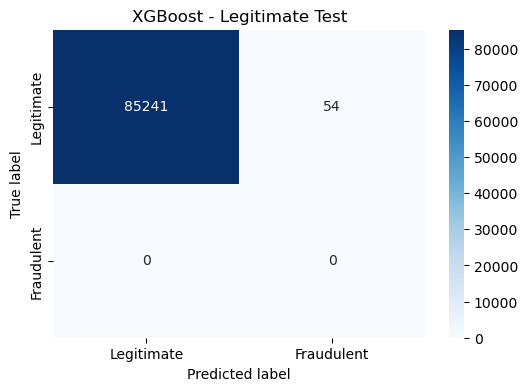

Confusion Matrix for Fraudulent Test Set:


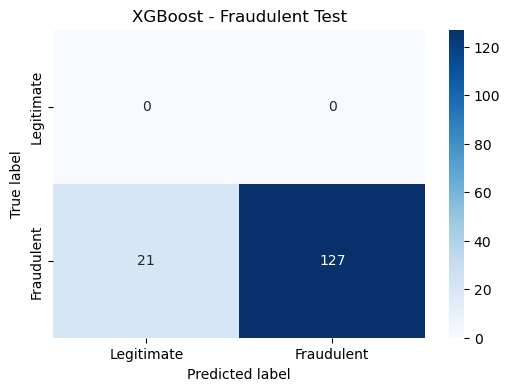

In [7]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE oversampling
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the oversampled data (SMOTE)
    results[model_name] = evaluate_model(model, x_train_smote, y_train_smote, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


In [8]:
print('shape of x_train_rus', x_train_smote.shape)
print('shape of y_train_rus', y_train_smote.shape)

print(results)

shape of x_train_rus (398040, 29)
shape of y_train_rus (398040,)
{'Decision Tree': {'accuracy_legit': 0.9461984876018524, 'accuracy_fraud': 0.918918918918919, 'confusion_matrix_legit': array([[80706,  4589],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 12, 136]])}, 'SVM': {'accuracy_legit': 0.9843601617914297, 'accuracy_fraud': 0.8851351351351351, 'confusion_matrix_legit': array([[83961,  1334],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 17, 131]])}, 'Random Forest': {'accuracy_legit': 0.9997537956503898, 'accuracy_fraud': 0.8243243243243243, 'confusion_matrix_legit': array([[85274,    21],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 26, 122]])}, 'Logistic Regression': {'accuracy_legit': 0.9741719913242277, 'accuracy_fraud': 0.9324324324324325, 'confusion_matrix_legit': array([[83092,  2203],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 10, 138]])},

Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.86322
Decision Tree Fraud Accuracy: 0.95270
Confusion Matrix for Legitimate Test Set:


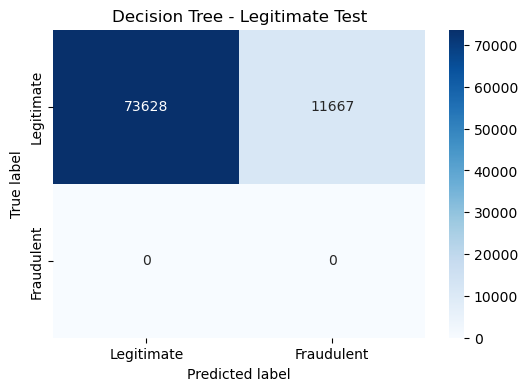

Confusion Matrix for Fraudulent Test Set:


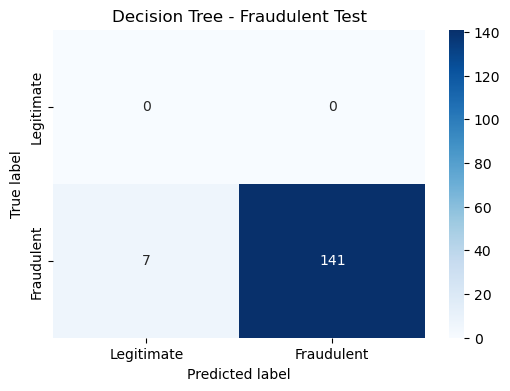

Evaluating SVM...
SVM Legit Accuracy: 0.98554
SVM Fraud Accuracy: 0.75676
Confusion Matrix for Legitimate Test Set:


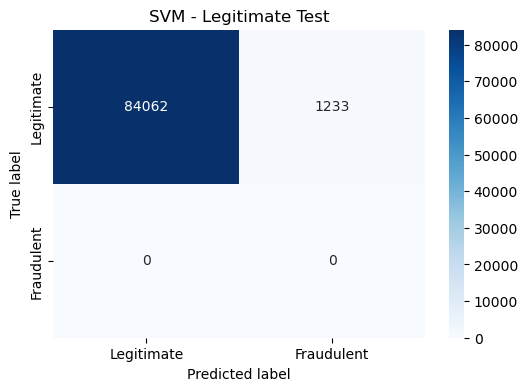

Confusion Matrix for Fraudulent Test Set:


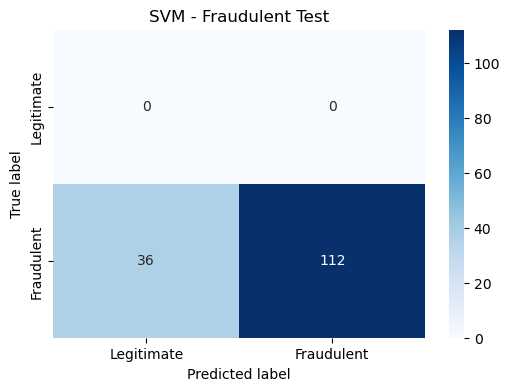

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.99973
Random Forest Fraud Accuracy: 0.83108
Confusion Matrix for Legitimate Test Set:


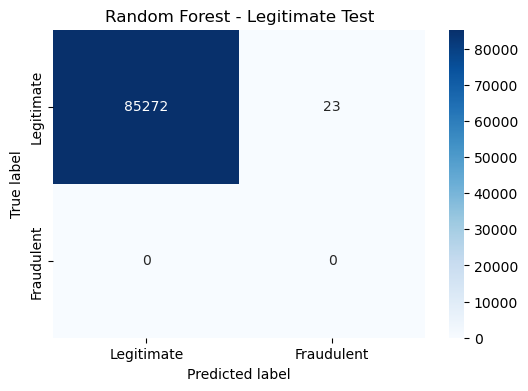

Confusion Matrix for Fraudulent Test Set:


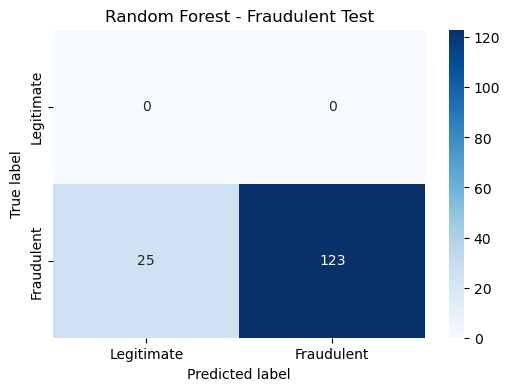

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.91022
Logistic Regression Fraud Accuracy: 0.94595
Confusion Matrix for Legitimate Test Set:


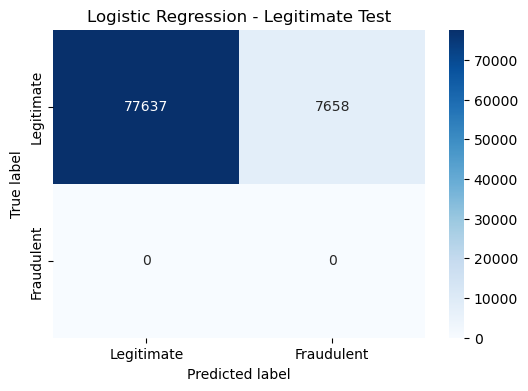

Confusion Matrix for Fraudulent Test Set:


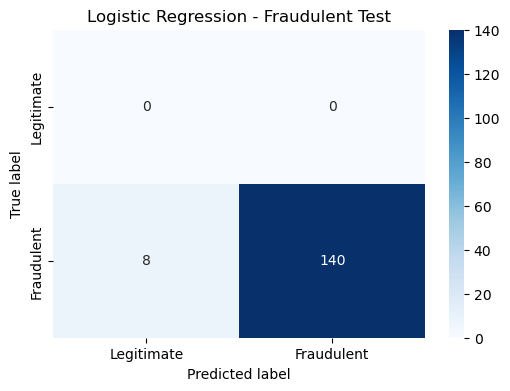

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.91182
AdaBoost Fraud Accuracy: 0.92568
Confusion Matrix for Legitimate Test Set:


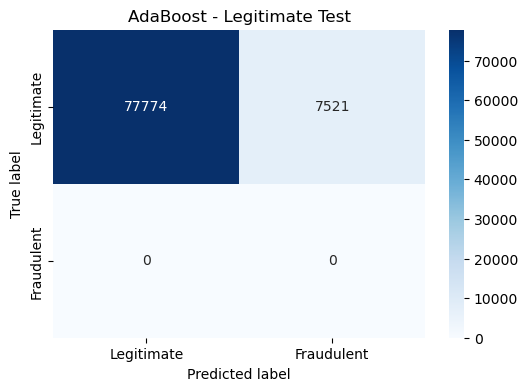

Confusion Matrix for Fraudulent Test Set:


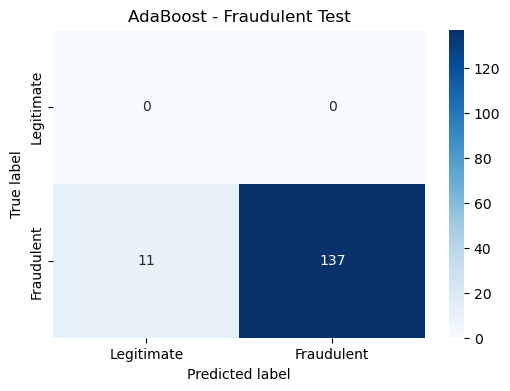

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.96194
GaussianNB Fraud Accuracy: 0.88514
Confusion Matrix for Legitimate Test Set:


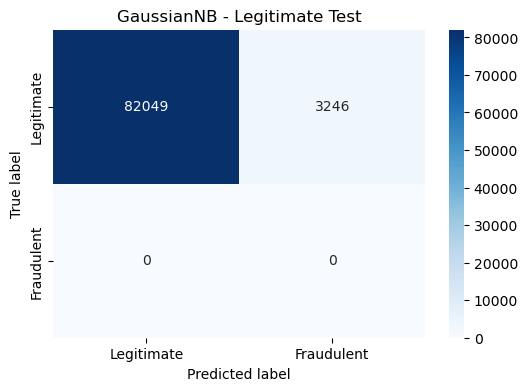

Confusion Matrix for Fraudulent Test Set:


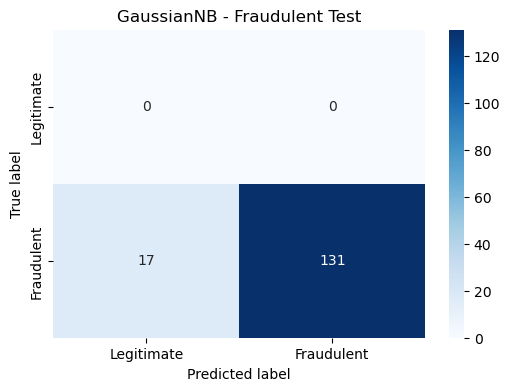

Evaluating KNN...
KNN Legit Accuracy: 0.99841
KNN Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


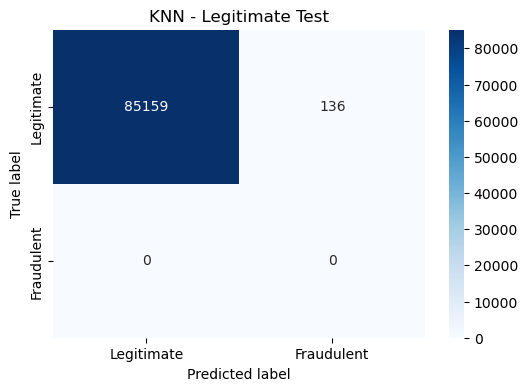

Confusion Matrix for Fraudulent Test Set:


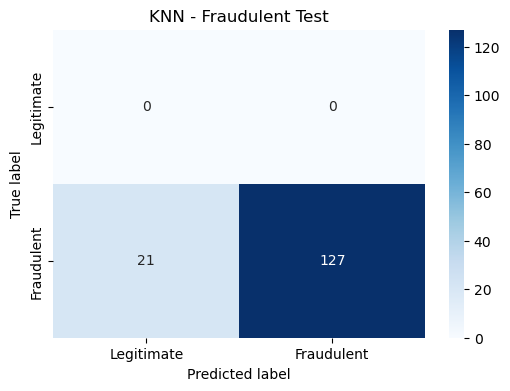

Evaluating XGBoost...


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Legit Accuracy: 0.99927
XGBoost Fraud Accuracy: 0.85135
Confusion Matrix for Legitimate Test Set:


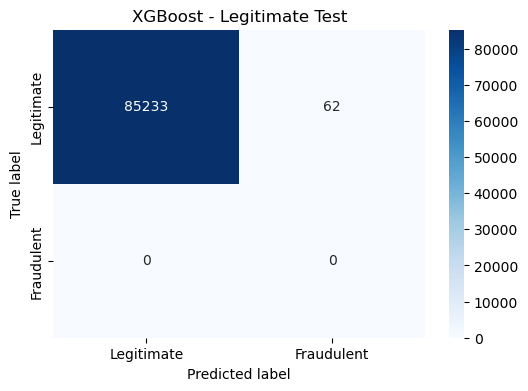

Confusion Matrix for Fraudulent Test Set:


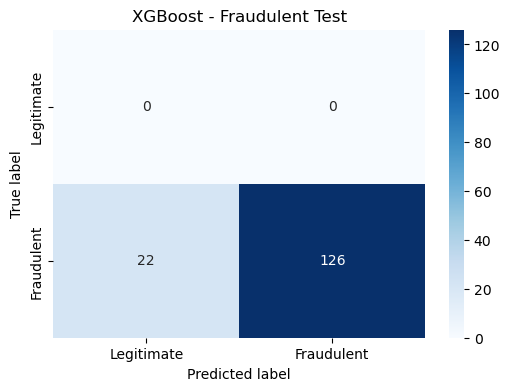

In [9]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN for oversampling
adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

results_adasyn = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the oversampled data (ADASYN)
    results_adasyn[model_name] = evaluate_model(model, x_train_adasyn, y_train_adasyn, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_adasyn[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_adasyn[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_adasyn[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_adasyn[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


In [10]:
results_adasyn

{'Decision Tree': {'accuracy_legit': 0.8632158977665748,
  'accuracy_fraud': 0.9527027027027027,
  'confusion_matrix_legit': array([[73628, 11667],
         [    0,     0]]),
  'confusion_matrix_fraud': array([[  0,   0],
         [  7, 141]])},
 'SVM': {'accuracy_legit': 0.9855442874728882,
  'accuracy_fraud': 0.7567567567567568,
  'confusion_matrix_legit': array([[84062,  1233],
         [    0,     0]]),
  'confusion_matrix_fraud': array([[  0,   0],
         [ 36, 112]])},
 'Random Forest': {'accuracy_legit': 0.9997303476170936,
  'accuracy_fraud': 0.831081081081081,
  'confusion_matrix_legit': array([[85272,    23],
         [    0,     0]]),
  'confusion_matrix_fraud': array([[  0,   0],
         [ 25, 123]])},
 'Logistic Regression': {'accuracy_legit': 0.9102174805088223,
  'accuracy_fraud': 0.9459459459459459,
  'confusion_matrix_legit': array([[77637,  7658],
         [    0,     0]]),
  'confusion_matrix_fraud': array([[  0,   0],
         [  8, 140]])},
 'AdaBoost': {'accura

Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.96186
Decision Tree Fraud Accuracy: 0.88514
Confusion Matrix for Legitimate Test Set:


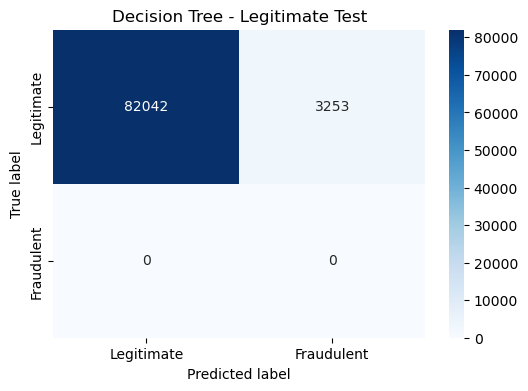

Confusion Matrix for Fraudulent Test Set:


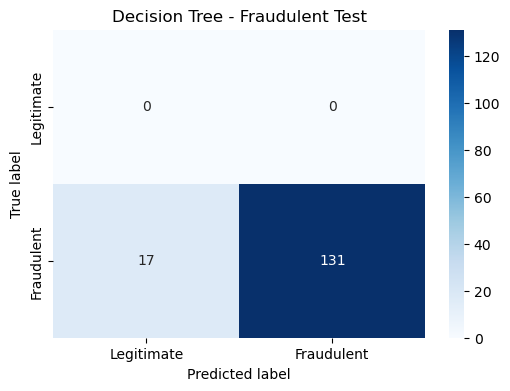

Evaluating SVM...
SVM Legit Accuracy: 0.98658
SVM Fraud Accuracy: 0.90541
Confusion Matrix for Legitimate Test Set:


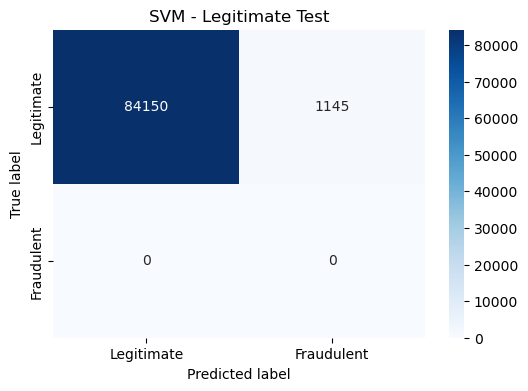

Confusion Matrix for Fraudulent Test Set:


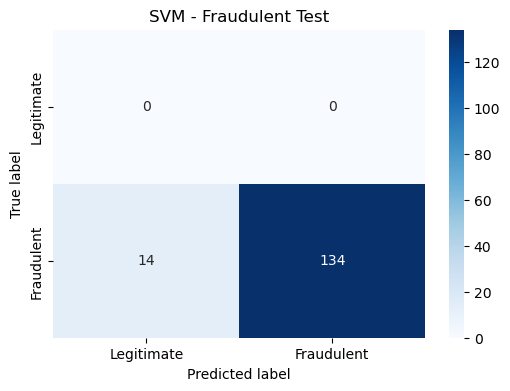

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.99988
Random Forest Fraud Accuracy: 0.82432
Confusion Matrix for Legitimate Test Set:


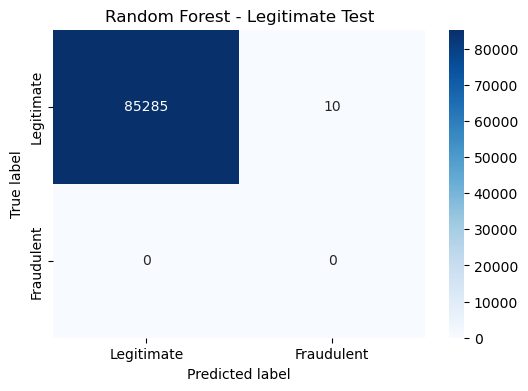

Confusion Matrix for Fraudulent Test Set:


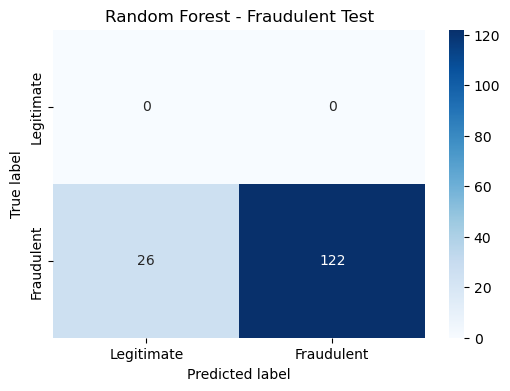

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97607
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


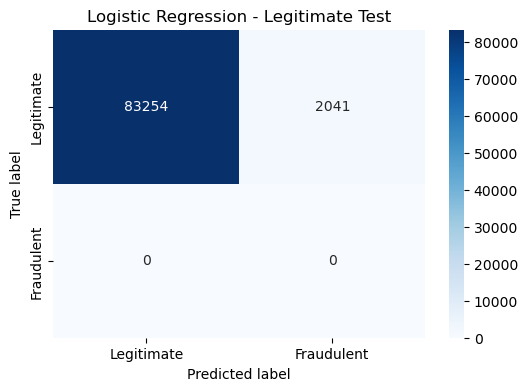

Confusion Matrix for Fraudulent Test Set:


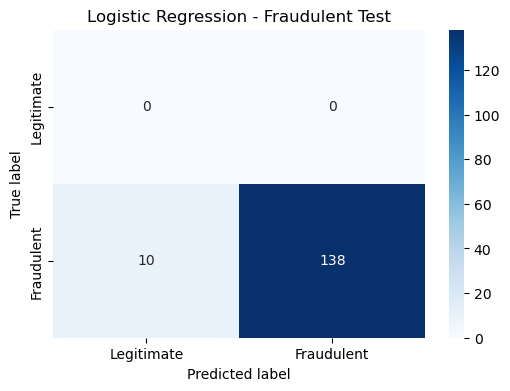

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.97692
AdaBoost Fraud Accuracy: 0.89189
Confusion Matrix for Legitimate Test Set:


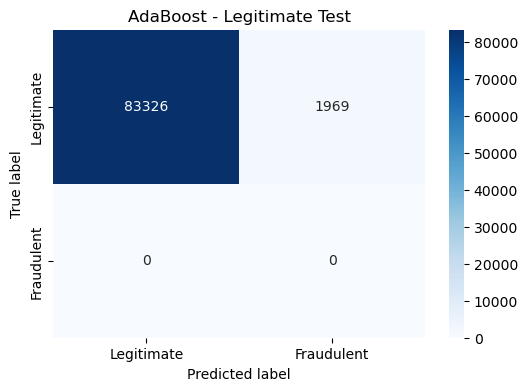

Confusion Matrix for Fraudulent Test Set:


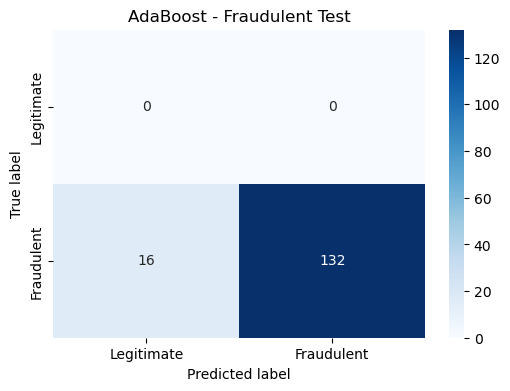

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97404
GaussianNB Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


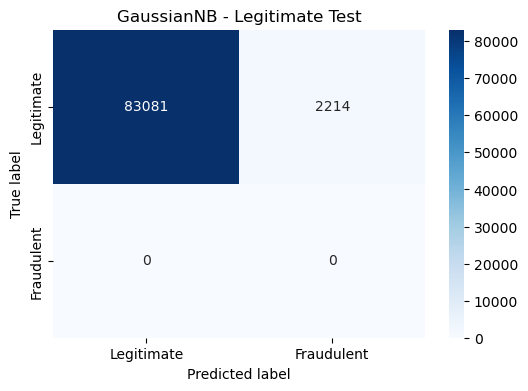

Confusion Matrix for Fraudulent Test Set:


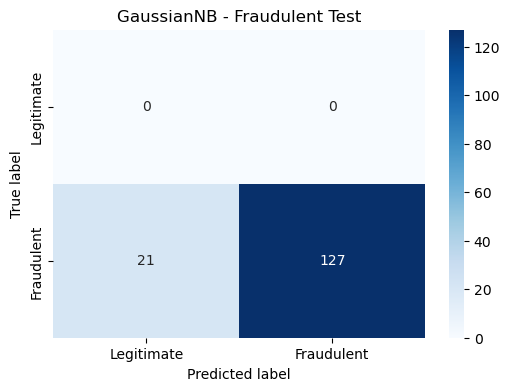

Evaluating KNN...
KNN Legit Accuracy: 0.99937
KNN Fraud Accuracy: 0.82432
Confusion Matrix for Legitimate Test Set:


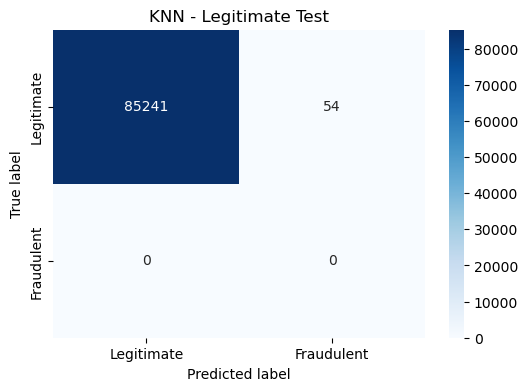

Confusion Matrix for Fraudulent Test Set:


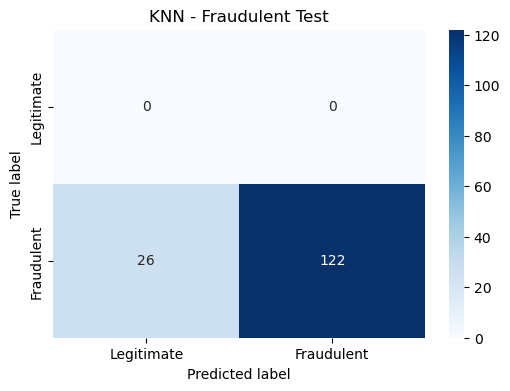

Evaluating XGBoost...


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Legit Accuracy: 0.99982
XGBoost Fraud Accuracy: 0.83108
Confusion Matrix for Legitimate Test Set:


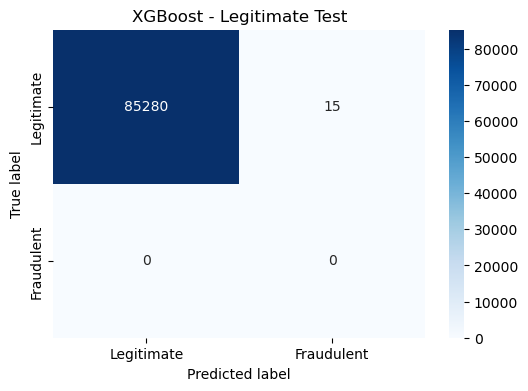

Confusion Matrix for Fraudulent Test Set:


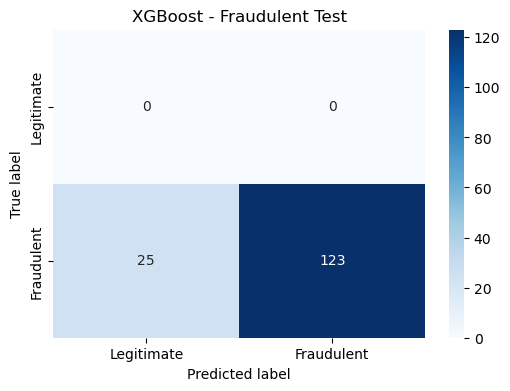

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling (ROS)
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

# Evaluate models on the ROS-balanced dataset
results_ros = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the oversampled data (ROS)
    results_ros[model_name] = evaluate_model(model, x_train_ros, y_train_ros, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_ros[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_ros[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_ros[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_ros[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


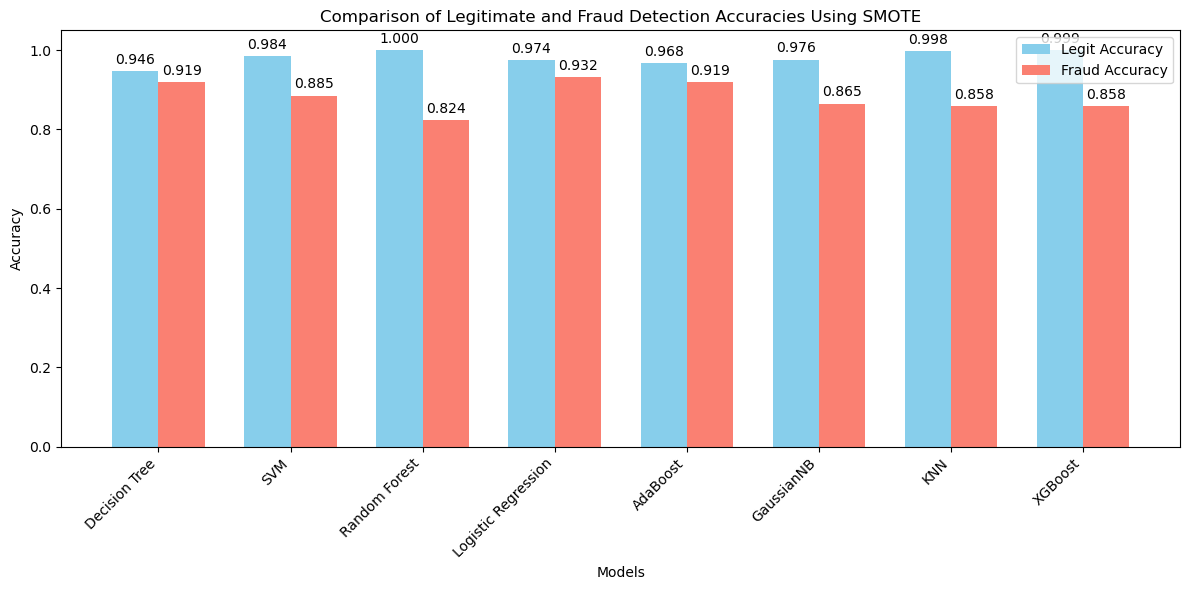

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


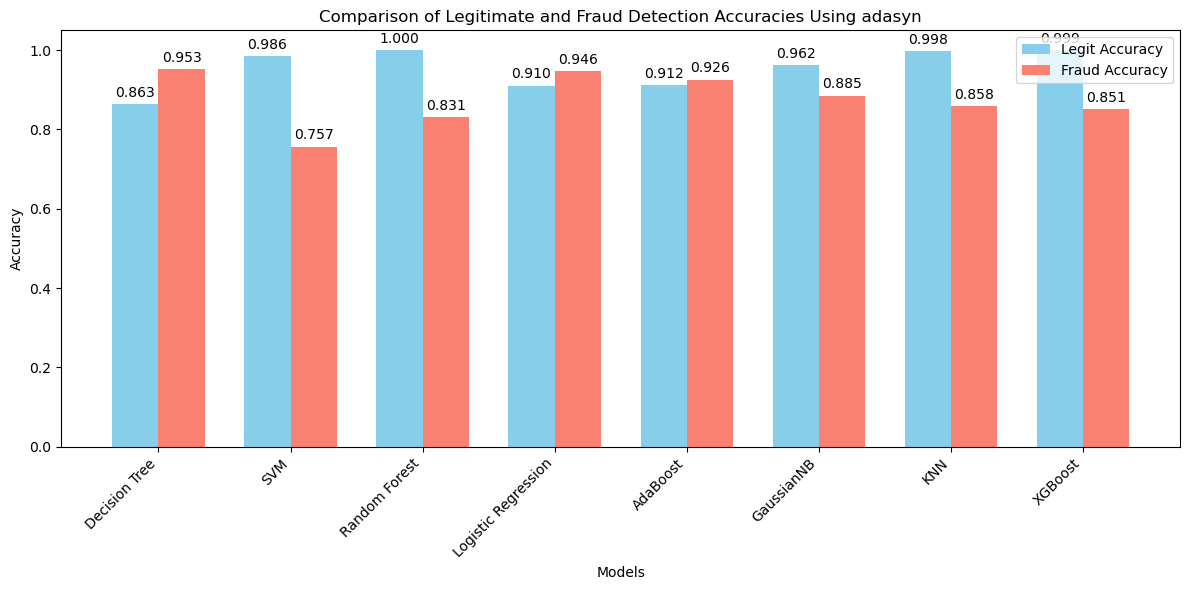

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_adasyn

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using adasyn')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


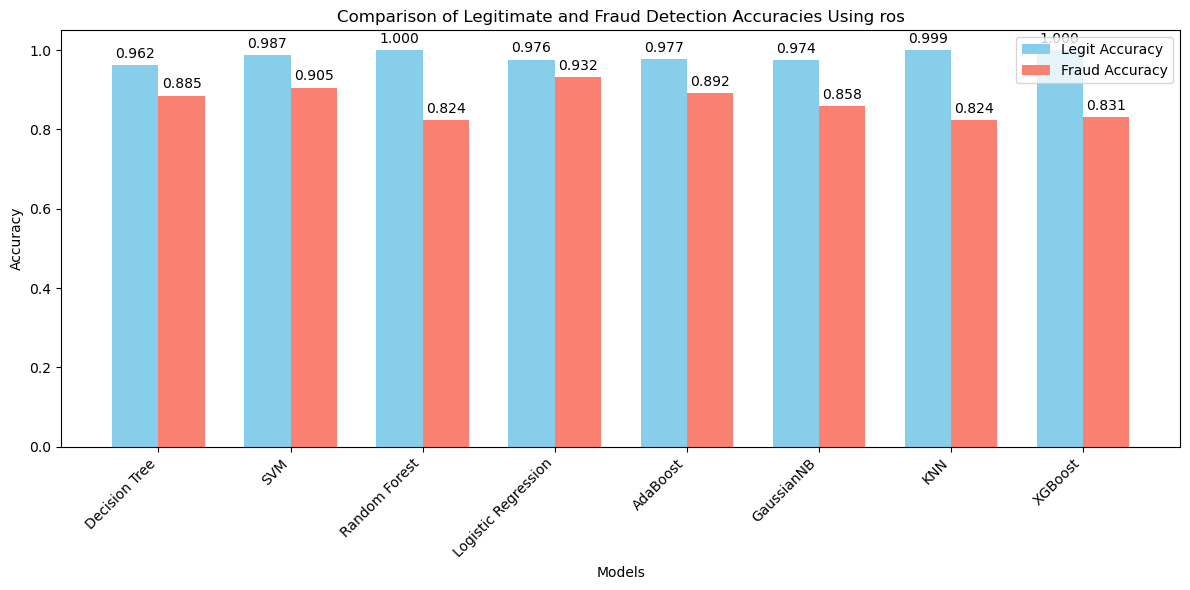

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_ros

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using ros')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Example data structure for different techniques (replace with actual results)
results = {
    'SMOTE': results,
    'ADASYN': results_adasyn,
    'ROS': results_ros
}

# Create a list to store the table data
table_data = []

for technique, models in results.items():
    row = {'Technique': technique}
    for model, acc in models.items():
        row[f'{model} (Legit)'] = f"{acc['accuracy_legit']:.5f}"
        row[f'{model} (Fraud)'] = f"{acc['accuracy_fraud']:.5f}"
    table_data.append(row)

# Convert to DataFrame
df_results = pd.DataFrame(table_data)

# Display the table
print(df_results.to_string(index=False))

# Optional: display table nicely in Jupyter Notebook
from IPython.display import display
display(df_results)


Technique Decision Tree (Legit) Decision Tree (Fraud) SVM (Legit) SVM (Fraud) Random Forest (Legit) Random Forest (Fraud) Logistic Regression (Legit) Logistic Regression (Fraud) AdaBoost (Legit) AdaBoost (Fraud) GaussianNB (Legit) GaussianNB (Fraud) KNN (Legit) KNN (Fraud) XGBoost (Legit) XGBoost (Fraud)
    SMOTE               0.96186               0.88514     0.98658     0.90541               0.99988               0.82432                     0.97607                     0.93243          0.97692          0.89189            0.97404            0.85811     0.99937     0.82432         0.99982         0.83108
   ADASYN               0.86322               0.95270     0.98554     0.75676               0.99973               0.83108                     0.91022                     0.94595          0.91182          0.92568            0.96194            0.88514     0.99841     0.85811         0.99927         0.85135
      ROS               0.96186               0.88514     0.98658     0.90541     

,Technique,Decision Tree (Legit),Decision Tree (Fraud),SVM (Legit),SVM (Fraud),Random Forest (Legit),Random Forest (Fraud),Logistic Regression (Legit),Logistic Regression (Fraud),AdaBoost (Legit),AdaBoost (Fraud),GaussianNB (Legit),GaussianNB (Fraud),KNN (Legit),KNN (Fraud),XGBoost (Legit),XGBoost (Fraud)
0,SMOTE,0.96186,0.88514,0.98658,0.90541,0.99988,0.82432,0.97607,0.93243,0.97692,0.89189,0.97404,0.85811,0.99937,0.82432,0.99982,0.83108
1,ADASYN,0.86322,0.95270,0.98554,0.75676,0.99973,0.83108,0.91022,0.94595,0.91182,0.92568,0.96194,0.88514,0.99841,0.85811,0.99927,0.85135
2,ROS,0.96186,0.88514,0.98658,0.90541,0.99988,0.82432,0.97607,0.93243,0.97692,0.89189,0.97404,0.85811,0.99937,0.82432,0.99982,0.83108


In [ ]:
Technique Decision Tree (Legit) Decision Tree (Fraud) SVM (Legit) SVM (Fraud) Random Forest (Legit) Random Forest (Fraud) Logistic Regression (Legit) Logistic Regression (Fraud) AdaBoost (Legit) AdaBoost (Fraud) GaussianNB (Legit) GaussianNB (Fraud) KNN (Legit) KNN (Fraud) XGBoost (Legit) XGBoost (Fraud)
SMOTE_TOMEK               0.94620               0.91892     0.98436     0.88514               0.99975               0.82432                     0.97417                     0.93243          0.96776          0.91892            0.97604            0.86486     0.99841     0.85811         0.99937         0.85811
  SMOTE_ENN               0.95207               0.91216     0.98408     0.88514               0.99970               0.82432                     0.97345                     0.93243          0.96706          0.92568            0.97594            0.86486     0.99803     0.85811         0.99928         0.85811
